# Text processing project

Choose one and submit it by end of week 05. 

In [2]:
# import packages
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import re
from urllib.parse import urlparse
import urllib.robotparser
from bs4 import BeautifulSoup

# This code checks the robots.txt file
def canFetch(url):

    parsed_uri = urlparse(url)
    domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)

    rp = urllib.robotparser.RobotFileParser()
    rp.set_url(domain + "/robots.txt")
    try:
        rp.read()
        canFetchBool = rp.can_fetch("*", url)
    except:
        canFetchBool = None
    
    return canFetchBool

## Project examples

#### Example 1

1) perform the analysis of data/ira.csv (similarly to what done in text_processing_intro.ipynb)

2) perform sentiment analysis on this dataset

3) detail comments, explain step by step what is happening, and try to write down a paragraph or two at the end discussing what you figured out

************
#### Example 2

1) Choose a short list of famous people (at least 2) that you want to compare and look for their Wikipedia page, e.g., 
urls = []
urls.append("https://en.wikipedia.org/wiki/LeBron_James")
urls.append("https://en.wikipedia.org/wiki/Michael_Jordan")
urls.append("https://en.wikipedia.org/wiki/Karl_Malone")

2) think about an interesting question you can answer. E.g., 
- in which of the three pages the word "record" appears more often? (we know how to search!)
- which is the most positive page? (we know how to do sentiment analysis!)
- in which year was each player born? (more complicated, but we can do it)

3) make sure you can web scrape each page

4) write the code to web scrape and do your analysis

5) prepare 1 (one) .ipynb , in which you have code, results and (most importantly) you describe what you are looking for and how you do it!

************
#### Example 3

1) check the books you like from https://www.gutenberg.org/browse/scores/top

2) you have an example in data/book1.txt ; choose 1 book (or a few of them)

3) think about an interesting question you can answer. E.g., 
- which are the most common words? (we know how to do it!)
- is there a particular word you have in mind? (easy to check)
- how many different words do we have?

4) can we download it automatically or better to do it manually? *CHECK BEFORE DOING IT!*
- in case we can not do it automatically, let's respect it! we can download them manually and save them
- get a quick look at http://www.gutenberg.org/wiki/Gutenberg:Terms_of_Use also!

5) let's analyze the book, we have all the tools from the notebooks processing_text and RegularExpressions! 


# Project title: 

your comments / presentation


In [71]:
# Introduction:
# For my project, I decided to choose Example 2 (web scraping)
# I am going to compare the 10 most common words from the 2 wiki pages of my 2 favorite NBA playors 
# My favorite 2 NBA players are Kobe Bryant and Tim Duncan
# I am going to remove any conjuctions and prepositions from my study as those words aren't that important

In [72]:
# All the imports that I need for my project
import seaborn as sns
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
# My first step is to check the status codes of my 2 websites
# This cell checks the status code for the Kobe wiki page
r_kobe = requests.get("https://en.wikipedia.org/wiki/Kobe_Bryant")
print(r_kobe.status_code)
r_kobe = requests.get("https://en.wikipedia.org/wiki/Kobe_Bryant")
r_kobe.status_code
r_kobe.text
r_kobe.ok
statusCodes_Kobe = [200, 404, 403, 429]
print(r_kobe.ok)

200
True


In [74]:
# My first step is to check the status codes of my 2 websites
# This cell checks the status code for the Duncan wiki page
r_duncan = requests.get("https://en.wikipedia.org/wiki/Tim_Duncan")
print(r_duncan.status_code)
r_duncan = requests.get("https://en.wikipedia.org/wiki/Tim_Duncan")
r_duncan.status_code
r_duncan.text
r_duncan.ok
statusCodes_Duncan = [200, 404, 403, 429]
print(r_duncan.ok)

200
True


In [11]:
## Here I am appending the two wiki sites into an array
url = []
url.append("https://en.wikipedia.org/wiki/Kobe_Bryant")
url.append("https://en.wikipedia.org/wiki/Tim_Duncan")

# In these 4 lines, I am requesting access to these 2 websites and getting the text
r_kobe = requests.get(url[0])
r_duncan = requests.get(url[1])
urlTextKobe = r_kobe.text
urlTextDuncan = r_duncan.text

## Here I am printing the first 100k characters of both sites (the whole site basically)
Number_Of_Characters = 100000
print(urlTextKobe[:Number_Of_Characters]) 
print("\n\n... " + str(len(urlTextKobe)-Number_Of_Characters) + " additional characters")
print(urlTextDuncan[:Number_Of_Characters]) 
print("\n\n... " + str(len(urlTextDuncan)-Number_Of_Characters) + " additional characters")


<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Kobe Bryant - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6e278830-79e4-43dd-8a79-e39a79fdbd10","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Kobe_Bryant","wgTitle":"Kobe Bryant","wgCurRevisionId":962118315,"wgRevisionId":962118315,"wgArticleId":246185,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Webarchive template webcite links","Pages containing links to subscription-only content","Articles with short description","Wikipedia indef

In [76]:
## In the cell, I am going to remove any HTML junk from the text and basically clean the text
## To do this I use the html parser to parse the url content and store it in a variable
soup = BeautifulSoup(urlTextKobe, 'html.parser')
page_response = requests.get(url[0],timeout=5)
page_content = BeautifulSoup(page_response.content, "html.parser")
soup2 = BeautifulSoup(urlTextDuncan, 'html.parser')
page_response2 = requests.get(url[1],timeout=5)
page_content2 = BeautifulSoup(page_response2.content, "html.parser")

## Here am I getting all the content within <p> paragraphs without any of the HTML junk for both sites
## I print the newly improved text and store it in 2 seperate strings for later use
paragraphs_kobe = page_content.find_all("p")
str_kobe = ""
for paragraph in paragraphs_kobe:
    str_kobe = str_kobe + paragraph.text
    print(paragraph.text)
    
paragraphs_duncan = page_content2.find_all("p")
str_duncan = ""
for paragraph2 in paragraphs_duncan:
    str_duncan = str_duncan + paragraph2.text
    print(paragraph2.text)



Kobe Bean Bryant (/ˈkoʊbiː/ KOH-bee; August 23, 1978 – January 26, 2020) was an American professional basketball player.  As a shooting guard, Bryant entered the National Basketball Association (NBA) directly from high school, and played his entire 20-season professional career in the league with the Los Angeles Lakers. Bryant won many accolades: five NBA championships, 18-time All-Star, 15-time member of the All-NBA Team, 12-time member of the All-Defensive Team, 2008 NBA Most Valuable Player (MVP), two-time NBA Finals MVP winner. Widely regarded as one of the greatest players of all time,[3][4][5][6] he led the NBA in scoring during two seasons, ranks fourth on the league's all-time regular season scoring and all-time postseason scoring lists.

Bryant was the son of former NBA player Joe Bryant. He attended Lower Merion High School in Pennsylvania, where he was recognized as the top high-school basketball player in the country. Upon graduation, he declared for the 1996 NBA draft an

In [77]:
## In this cell, I am finally going to figure out the 10 most common words in the Kobe wiki page

## I first remove any common conjuctions from the research by using a union
remove_words = set(word.strip() for word in str_kobe)
remove_words = remove_words.union(set(['the','in','and','at', 'as', 'by', 'an', 'had', 'after', 'against', 'to','said', 'of', 'his', 'that','was', 'he', 'for', 'on', 'with']))

## This is a empty dictionary that will help me keep track of my word count
wordcount_kobe = {}

## I am going to run a for loop and count the # of words in the Kobe article
for word in str_kobe.lower().split():
    ## These five lines replace any common punctuation with an empty string
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("*","")
    if word not in remove_words:
        if word not in wordcount_kobe:
            wordcount_kobe[word] = 1
        else:
            wordcount_kobe[word] += 1
            
## These next few lines allow me to choose how many words I want to print (I am using 10 for my study)
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words in the Kobe wiki page are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount_kobe)

## Finally I print the most common word and its respective word count
for word, count in word_counter.most_common(n_print):
    print(word, ":", count)

How many most common words to print: 10

OK. The 10 most common words in the Kobe wiki page are as follows

bryant : 329
game : 127
lakers : 105
nba : 94
points : 91
season : 86
first : 76
team : 62
bryant's : 55
games : 51


In [78]:
## In this cell, I am finally going to figure out the 10 most common words in the Duncan wiki page

## I first remove any common conjuctions from the research by using a union
remove_words2 = set(word2.strip() for word2 in str_duncan)
remove_words2 = remove_words2.union(set(['the','in','and','at', 'as', 'by', 'an', 'had', 'after', 'against', 'to','said', 'of', 'his', 'that','was', 'he', 'for', 'on', 'with']))

## This is a empty dictionary that will help me keep track of my word count
wordcount_duncan = {}

## I am going to run a for loop and count the # of words in the Duncan article
for word2 in str_duncan.lower().split():
    ## These five lines replace any common punctuation with an empty string
    word2 = word2.replace(".","")
    word2 = word2.replace(",","")
    word2 = word2.replace(":","")
    word2 = word2.replace("\"","")
    word2 = word2.replace("!","")
    word2 = word2.replace("*","")
    if word2 not in remove_words2:
        if word2 not in wordcount_duncan:
            wordcount_duncan[word2] = 1
        else:
            wordcount_duncan[word2] += 1
            
## These next few lines allow me to choose how many words I want to print (I am using 10 for my study)
n_print2 = int(input("How many most common words to print: "))
print("\nOK. The {} most common words in the Duncan wiki page are as follows\n".format(n_print2))
word_counter2 = collections.Counter(wordcount_duncan)

## Finally I print the most common word and its respective word count
for word2, count2 in word_counter2.most_common(n_print2):
    print(word2, ":", count2)

How many most common words to print: 10

OK. The 10 most common words in the Duncan wiki page are as follows

duncan : 164
nba : 77
spurs : 74
game : 67
first : 54
season : 47
player : 46
team : 44
points : 41
one : 33


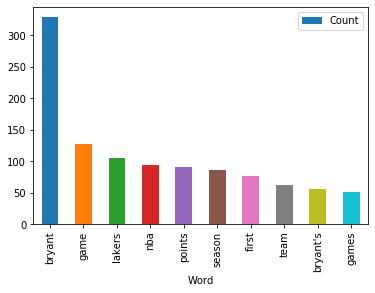

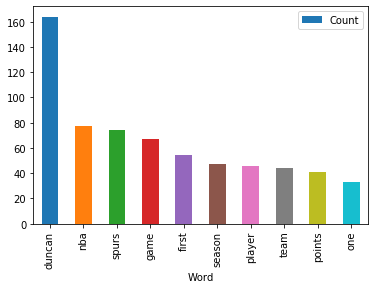

In [79]:
## To finish off my code, I am going to 2 seperate bar graphs representing the top 10 words of each site
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

lst2 = word_counter2.most_common(n_print2)
df2 = pd.DataFrame(lst2, columns = ['Word', 'Count'])
df2.plot.bar(x='Word',y='Count')

In [70]:
## Results and Conclusion
## The most common word from each of the 2 sites are the last name of each player
## In the top 10 of each site, there are 6 common words: nba, game, points, team, season, first
## The word count for each of the top 10 words in the Kobe article is much higher than the word count for each of the top 10 words in the Duncan article
## All and all, it was interesting to research the wiki pages of my favorite 2 NBA players